# 2-1 過学習を体感しよう

In [1]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
np.random.seed(23)
M, N = 80, 32
# ダミーデータ
X = np.random.randn(M, N)
y = X.sum(1) * 0.4 + np.random.randn(M)

In [2]:
# 説明変数の数を変えて評価
res1, res2 = [], []
nums = [1, 2, 4, 8, 12, 16, 20, 24, 28, 32]  # 説明変数の数
for num in nums:
    lst1, lst2 = [], []
    for i in range(20):  # 20回の平均を取る
        X_train, X_test, y_train, y_test = (
            train_test_split(X, y, test_size=M//2, random_state=i))
        lr = LinearRegression().fit(X_train[:, :num], y_train)
        lst1.append(mean_squared_error(y_train, lr.predict(X_train[:, :num])))
        lst2.append(mean_squared_error(y_test, lr.predict(X_test[:, :num])))
    res1.append(np.mean(lst1))
    res2.append(np.mean(lst2))

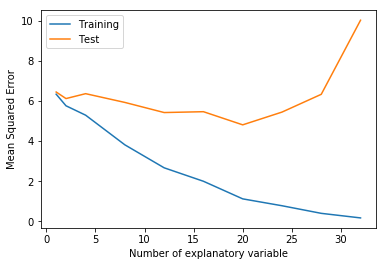

In [3]:
# グラフで比較
plt.xlabel('Number of explanatory variable')
plt.ylabel('Mean Squared Error')
plt.plot(nums, res1, label='Training')
plt.plot(nums, res2, label='Test')
plt.legend();

In [5]:
from sklearn.datasets import load_boston
from sklearn.decomposition import PCA
X, y = load_boston(True)  # ボストン市の住宅価格データ一式

In [6]:
# 全説明変数のときの結果
X_train, X_test, y_train, y_test = (
    train_test_split(X, y, test_size=len(y)//2, random_state=0))
lr = LinearRegression().fit(X_train, y_train)
score1 = mean_squared_error(y_train, lr.predict(X_train))
score2 = mean_squared_error(y_test, lr.predict(X_test))
score1, score2  # トレーニングデータとテストデータの平均二乗誤差

(19.62834866307915, 25.309383412712066)

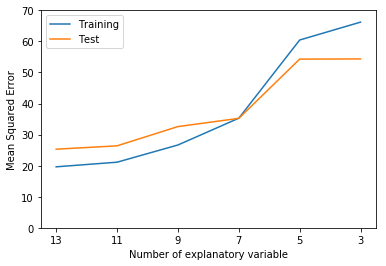

In [8]:
# 次元削減の効果
res1, res2 = [], []
nums = [13, 11, 9, 7, 5, 3]
for num in nums:
    X_pca = PCA(num).fit_transform(X)
    X_train, X_test, y_train, y_test = (
        train_test_split(X_pca, y, test_size=len(y)//2, random_state=0))
    lr = LinearRegression().fit(X_train, y_train)
    res1.append(mean_squared_error(y_train, lr.predict(X_train)))
    res2.append(mean_squared_error(y_test, lr.predict(X_test)))
    
    # グラフで比較
plt.xlabel('Number of explanatory variable')
plt.ylabel('Mean Squared Error')
plt.ylim((0, 70))
plt.xticks(range(len(nums)), nums)
plt.plot(res1, label='Training')
plt.plot(res2, label='Test')
plt.legend();

次元削減は、sklearn.decomposition.PCAを使って、PCA(新しい次元数).fit_transform(元のデータ)とするとできます。

ボストン市の住宅価格データでは、RM, PTRATIO, B, LSTATといった有用な説明変数と、ノイズに近い説明変数が混じっています。
ここでは、まとめて次元削減を行うの、有用な説明変数の情報も小さくなってしまいます。

次元数を変えたときのトレーニングデータ（青い線）とテストデータ（オレンジの線）の平均二乗誤差をグラフで比較します。

次元削減をすると、情報量が減るのでトレーニングデータの平均二乗誤差は増えていきます。
テストデータの平均二乗誤差も増えていきますが、過学習が抑えられるので、増え方は緩やかになります。

コラム
効果的に次元削減するためには、有用なデータは対象外にしたり、正規化したりするとよいでしょう。